## **Training**

#### **Importing Libraries**

In [1]:
import random
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

'''
NLTK - Natural Language Toolkit

Purpose of facilitating natural language processing (NLP) tasks by providing a 
comprehensive set of tools and resources for working with human language data in Python.
'''
import nltk
# nltk.download()
from nltk.stem import WordNetLemmatizer # will reduce word to its stem

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

#### **Loading Training Data**

In [2]:
# Loading JSON file with conversational speech and responses
intents = json.loads(open('Intent English.json').read())

#### **Sorting Data from JSON File**

In [3]:
# Algorithm that reduces words to their base or canonical form
lemmatizer = WordNetLemmatizer()

# Empty Lists
words = []
classes = []
documents = []
ignore_letters = ['?', '!', '.', ',', '(', ')']

''' 
Purpose:
Get the all contents of the JSON file,  
'''

for intent in intents['intents']:                       # Get all contents of JSON file
    for pattern in intent['patterns']:                  # Get the pattern

        word_list = nltk.word_tokenize(pattern)         # Split pattern sentence into individual words or tokens
        words.extend(word_list)                         # Taking the content and appending it to the list
        documents.append((word_list, intent['tag']))    # Tuple with the tokenized pattern sentence as a list, with get the tag associated 

        if intent['tag'] not in classes:                # If the tag is not already in classes List add the tag to the classes list
            classes.append(intent['tag'])               # classes list = Tags List

print(documents)
print(classes)

[(['Hello'], 'BorderSecurityGreeting'), (['Hi'], 'BorderSecurityGreeting'), (['Good', 'morning'], 'BorderSecurityGreeting'), (['Greetings'], 'BorderSecurityGreeting'), (['How', "'s", 'it', 'going', '?'], 'BorderSecurityGreeting'), (['Here', 'are', 'my', 'documents'], 'BorderSecurityDocuments'), (['Passport', 'and', 'visa'], 'BorderSecurityDocuments'), (['Identification'], 'BorderSecurityDocuments'), (['Is', 'there', 'anything', 'I', 'should', 'know', '?'], 'BorderSecurityQuestion'), (['What', "'s", 'the', 'process', '?'], 'BorderSecurityQuestion'), (['Any', 'restrictions', '?'], 'BorderSecurityQuestion'), (['What', 'items', 'are', 'prohibited', '?'], 'BorderSecurityProhibitedItems'), (['Can', 'I', 'carry', 'a', 'pocket', 'knife', '?'], 'BorderSecurityProhibitedItems'), (['Are', 'electronic', 'cigarettes', 'allowed', '?'], 'BorderSecurityProhibitedItems'), (['Do', 'I', 'need', 'to', 'remove', 'my', 'shoes', '?'], 'AirportSecurityScreening'), (['Can', 'I', 'keep', 'my', 'laptop', 'in', '

#### **Preparing Training Data**

##### Lemmatizing the Data & Cleaning Up the Data

In [4]:
words = [lemmatizer.lemmatize(word) for word in words if word not in ignore_letters]    # Algorithm that reduces words from the words list created, to their base or canonical form
words = sorted(set(words))                                                              # Set eliminates duplicates and sorted turns it back into a list and sorts it - Words List
classes = sorted(set(classes))                                                          # Set eliminates duplicates and sorted turns it back into a list and sorts it - Classes List

pickle.dump(words, open('words.pkl', 'wb'))                                             # Save Words list as a pickle file
pickle.dump(classes, open('classes.pkl', 'wb'))                                         # Save Classes list as a pickle file

['Hello', 'Hi', 'Good', 'morning', 'Greetings', 'How', "'s", 'it', 'going', 'Here', 'are', 'my', 'document', 'Passport', 'and', 'visa', 'Identification', 'Is', 'there', 'anything', 'I', 'should', 'know', 'What', "'s", 'the', 'process', 'Any', 'restriction', 'What', 'item', 'are', 'prohibited', 'Can', 'I', 'carry', 'a', 'pocket', 'knife', 'Are', 'electronic', 'cigarette', 'allowed', 'Do', 'I', 'need', 'to', 'remove', 'my', 'shoe', 'Can', 'I', 'keep', 'my', 'laptop', 'in', 'the', 'bag', 'What', "'s", 'the', 'procedure', 'for', 'liquid', 'This', 'is', 'too', 'strict', 'I', 'do', "n't", 'understand', 'why', 'I', 'ca', "n't", 'bring', 'this', 'I', 'need', 'to', 'speak', 'to', 'a', 'supervisor', 'This', 'is', 'ridiculous', 'You', 'people', 'are', 'making', 'this', 'difficult', 'I', 'wo', "n't", 'remove', 'my', 'shoe', 'I', 'refuse', 'to', 'open', 'my', 'bag', 'I', 'wo', "n't", 'follow', 'these', 'rule', 'I', "'m", 'not', 'doing', 'this', 'I', 'demand', 'to', 'be', 'treated', 'differently', '

In [16]:
for word in range(0, len(words)):
    if words[word] not in ignore_letters:
        print(words[word])

'm
's
've
Any
Appreciate
Are
Assistance
B
Can
Do
Fragile
Good
Grateful
Greetings
Hello
Here
Hi
How
I
Identification
In
Is
My
Okay
Passport
Please
PreCheck
Prohibited
Sounds
TSA
Terminal
Thank
This
WHere
We
What
Where
Why
You
a
allowed
and
anything
are
area
assistance
bag
baggage
be
been
belonging
bring
ca
can
carry
case
check
checkpoint
cigarette
claim
counter
custom
demand
departure
desk
detected
differently
difficult
disability
discovered
do
document
doing
electronic
emergency
exit
expedited
find
flyer
follow
for
found
fragile
frequent
gate
gentle
go
going
good
guide
have
help
in
inside
is
it
item
keep
knife
know
laptop
liquid
lost
luggage
making
me
misplaced
missing
morning
my
n't
nearby
nearest
need
not
of
open
passport
people
phone
pocket
procedure
process
prohibited
qualify
random
randomly
refuse
remove
required
restricted
restriction
ridiculous
rule
screening
security
selected
service
shoe
should
show
speak
special
strict
suitcase
supervisor
the
there
these
this
to
too
treated
u

##### Bag-Of-Words
It converts text data into a numerical format (bag-of-words) and prepares the corresponding labels for training a machine learning model

In [23]:
training = []                                                                       # Empty training list
output_empty = [0] * len(classes)                                                   # Empty output list length of Classes list

for document in documents:                                                          # For each element in Documents list
    bag = []                                                                        # Empty bag list
    word_patterns = document[0]                                                     # Get the tokenized pattern sentence from the document tuple
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]  # Make the tokenized pattern sentence lowercase (normalize)

    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)                   # If the word in the words list is in the word_patterns list, append 1 to list bag or else 0

    output_row = list(output_empty)                                                 # Empty row output list from empty output list
    output_row[classes.index(document[1])] = 1                                      # This creates a one-hot encoded representation of the class/tag label
    training.append([bag, output_row])                                              # Append list with bag list and output list to empty training list

##### Splitting the Datasets - Train_X and Train_Y

In [24]:
random.shuffle(training)        # Shuffle or randomize the order of elements in the training list
training = np.array(training)   # Into an array

train_x = list(training[:, 0])  # Get first column - bag list
train_y = list(training[:, 1])  # Get second column - output_row list

C:\Users\Nitya\AppData\Local\Temp\ipykernel_14900\3906750278.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)   # Into an array


#### **Neural Network**

In [25]:
model = Sequential()                                                            # A new instance of a Sequential model

model.add(Dense(128, input_shape = (len(train_x[0]),), activation = 'relu'))    # Layer 1 - 128 neurons, shape of layer is the shape of the input data, activation function of Rectified Linear Unit (ReLU)
model.add(Dropout(0.5))                                                         # Dropout Layer to reduce overfitting  by preventing any single neuron from becoming overly specialized and dependent on specific input features
                                                                                # Dropout Rate of 0.5, approx. 50% of the input neurons in the dropout layer will be set to 0 at each update
model.add(Dense(64, activation = 'relu'))                                       # Layer 2 - 64 neurons, activation function of Rectified Linear Unit (ReLU)
model.add(Dense(32, activation = 'relu'))                                       # Layer 3 - 50 neurons, activation function of Rectified Linear Unit (ReLU)
model.add(Dropout(0.5))                                                         # Dropout Rate of 0.5, approx. 50% of the input neurons in the dropout layer will be set to 0 at each update
model.add(Dense(len(train_y[0]), activation = 'softmax'))                       # Layer 4 - (len of tarin_y) = # of neurons and activation function softmax
                                                                                # Softmax - squashes the raw output scores of the neurons into probabilities, where each neuron's output represents the probability of belonging to a particular class

# Stochastic Gradient Descent (SGD) optimizer
# Learning Rate - the step size at which the optimizer updates the model's weights during training (0.01)
# Momentum - 90% of the previous weight update is retained and added to the current update. This helps the optimizer maintain direction and speed during training
# Nesterov - Nesterov Accelerated Gradient (NAG) adjusts the way the momentum term is applied, making it more accurate and often leading to faster convergence
sgd = SGD(learning_rate = 0.01, momentum = 0.9, nesterov = True) # weight_decay = 1e-6

# Loss function measures the dissimilarity between the true class labels and the predicted probabilities for each class
# SGD optimizer for training the model
# Metrics measures the proportion of correctly classified examples in the validation set during training
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = sgd, metrics = ['accuracy'])

# Epochs - 200 complete pass through of the entire training dataset
# Updating the weights after processing batches of 5, mini-batch training is a common practice as it can lead to more stable convergence and efficient training
# Verbose - controls the level of logging or output during training, a value of 1 means you will see progress bars and training metrics (e.g., loss and accuracy) for each epoch
hist = model.fit(np.array(train_x), np.array(train_y), epochs = 200, batch_size = 5, verbose = 1)

Epoch 1/200


13/13 [==============================] - 1s 2ms/step - loss: 2.9884 - accuracy: 0.0312
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 2.9264 - accuracy: 0.0312
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 2.9012 - accuracy: 0.0625
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 2.8957 - accuracy: 0.1094
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 2.9018 - accuracy: 0.1094
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 2.8839 - accuracy: 0.1250
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 2.8262 - accuracy: 0.1562
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 2.7786 - accuracy: 0.2031
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 2.7792 - accuracy: 0.1875
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 2.6919 - accuracy: 0.2031
Epoch 11/200
13/13 [=

#### **Plotting the Accuracy & Training Loss**

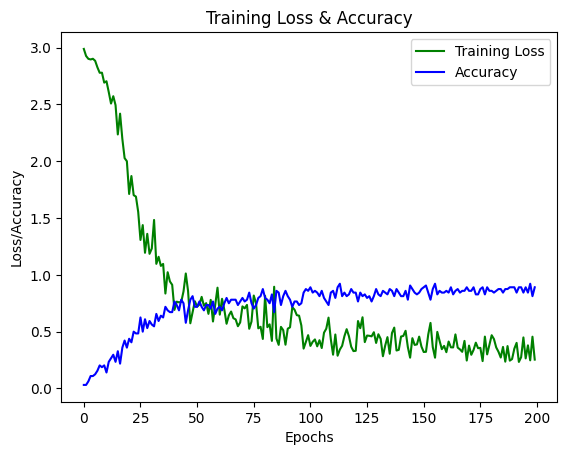

In [26]:
loss_train = hist.history['loss']                           # Get Loss Data
accuracy = hist.history['accuracy']                         # Get Accuracy Data
epochs = range(0, 200)                                      # Epochs from above

plt.plot(epochs, loss_train, 'g', label = 'Training Loss')  # Plot Epochs vs Training Loss Data
plt.plot(epochs, accuracy, 'b', label = 'Accuracy')         # Plot Epochs vs Accuracy Data

# Formating of Plot
plt.title('Training Loss & Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

#### **Saving the Model**

In [27]:
# Save the model created
model.save('chatbotmodel.h5', hist)

print('Done')

Done
